In [9]:
# source / target dir
data_dir = "../../data/benchmarking-jmh/imagesize/*" 
save_dir = "../images/imagesize/" 

# activating autoreload
%load_ext autoreload
%autoreload 2

import sys
from script import create_master_dataframe

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
# creating a sub-dataframe based on conditions

from script import cond_and

# creating a cumulative dataframe from all the files
mdf = create_master_dataframe(data_dir)

name = "clij_ij_comparison"

cond_pc = mdf["Filename"].str.contains(name) # cond computer name
cond_list = [cond_pc] # combine them in a list
cond = cond_and(cond_list) # generate their intersection

# creating a sub-dataframe that satisfies the respective conditions
#mdf = mdf[cond]
mdf = mdf.drop(["Param: radius"], axis=1)

# sizes; as specified in clij-benchmarking-jmh repository:
sizes2D = [
    1 * 1 * 1,
    128 * 128 * 1,
    256 * 256 * 1,
    512 * 512 * 1,
    600 * 600 * 1,
    800 * 800 * 1,
    1024 * 1024 * 1,
    1200 * 1200 * 1,
    1400 * 1400 * 1,
    1600 * 1600 * 1,
    1800 * 1800 * 1,
    2048 * 2048 * 1,
    3072 * 3072 * 1,
    4096 * 4096 * 1]

sizes3D = [
    1 * 1 * 1,
    1024 * 1024 * 4,
    1024 * 1024 * 8,
    1024 * 1024 * 12,
    1024 * 1024 * 16,
    1024 * 1024 * 20,
    1024 * 1024 * 24,
    1024 * 1024 * 32,
    1024 * 1024 * 40,
    1024 * 1024 * 50,
    1024 * 1024 * 64,
    1024 * 1024 * 80,
    1024 * 1024 * 100,
    1024 * 1024 * 128]

def fixSizes(row):
    size = row['Param: size']
    benchmark = row['Benchmark']
    
    bytesPerPixel = 2
    
    if "2D" in benchmark:
        size = sizes2D[size] * bytesPerPixel / 1024 / 1024 # convert in MB
    else:
        size = sizes3D[size] * bytesPerPixel  / 1024 / 1024 # convert in MB
    return size

# replace size placeholders (0,1,2,3,4) with actual size in MB
mdf['Param: size'] = mdf.apply(lambda row: fixSizes(row), axis=1)


In [11]:
mdf

,Filename,Benchmark,Mode,Threads,Samples,Score,Score Error (99.9%),Unit,Param: size
0,imagesize\jmh-result_MYERS-PC-21_.AddImagesWei...,net.haesleinhuepf.clij.benchmark.jmh.AddImages...,ss,1,100,1.237809e+06,1.727837e+05,ns/op,0.000002
1,imagesize\jmh-result_MYERS-PC-21_.AddImagesWei...,net.haesleinhuepf.clij.benchmark.jmh.AddImages...,ss,1,100,1.058107e+06,5.477499e+04,ns/op,0.031250
2,imagesize\jmh-result_MYERS-PC-21_.AddImagesWei...,net.haesleinhuepf.clij.benchmark.jmh.AddImages...,ss,1,100,1.120117e+06,5.543515e+04,ns/op,0.125000
3,imagesize\jmh-result_MYERS-PC-21_.AddImagesWei...,net.haesleinhuepf.clij.benchmark.jmh.AddImages...,ss,1,100,1.281972e+06,6.880572e+04,ns/op,0.500000
4,imagesize\jmh-result_MYERS-PC-21_.AddImagesWei...,net.haesleinhuepf.clij.benchmark.jmh.AddImages...,ss,1,100,1.306399e+06,5.994537e+04,ns/op,0.686646
5,imagesize\jmh-result_MYERS-PC-21_.AddImagesWei...,net.haesleinhuepf.clij.benchmark.jmh.AddImages...,ss,1,100,1.423704e+06,5.215560e+04,ns/op,1.220703
6,imagesize\jmh-result_MYERS-PC-21_.AddImagesWei...,net.haesleinhuepf.clij.benchmark.jmh.AddImages...,ss,1,100,1.664660e+06,5.068535e+04,ns/op,2.000000
7,imagesize\jmh-result_MYERS-PC-21_.AddImagesWei...,net.haesleinhuepf.clij.benchmark.jmh.AddImages...,ss,1,100,1.970533e+06,3.184295e+05,ns/op,2.746582
8,imagesize\jmh-result_MYERS-PC-21_.AddImagesWei...,net.haesleinhuepf.clij.benchmark.jmh.AddImages...,ss,1,100,2.198939e+06,5.518777e+04,ns/op,3.738403
9,imagesize\jmh-result_MYERS-PC-21_.AddImagesWei...,net.haesleinhuepf.clij.benchmark.jmh.AddImages...,ss,1,100,2.416853e+06,5.966319e+04,ns/op,4.882812


----- processing a new frame -----
----- detected operations:
AddImagesWeighted2D
AddImagesWeighted3D
AddScalar2D
AddScalar3D
AutoThreshold2D
AutoThreshold3D
BinaryAnd2D
BinaryAnd3D
Erode2D
Erode3D
FixedThreshold2D
FixedThreshold3D
Flip2D
Flip3D
GaussianBlur2D
GaussianBlur3D
MaximumZProjection
Mean2D
Mean3D
Median2D
Median3D
Minimum2D
Minimum3D
MultiplyScalar2D
MultiplyScalar3D
RadialReslice
Rotate2D
Rotate3D
----- detected machines:
MYERS-PC-21
MYERS-PC-22
----- detected benchmarks:
clij
ijapi
ijrun
clij_sphere
vib
----- detected params:
Param: size
----- parameter Param: size has the following values:
[1.90734863e-06 3.12500000e-02 1.25000000e-01 5.00000000e-01
 6.86645508e-01 1.22070312e+00 2.00000000e+00 2.74658203e+00
 3.73840332e+00 4.88281250e+00 6.17980957e+00 8.00000000e+00
 1.80000000e+01 3.20000000e+01 1.60000000e+01 2.40000000e+01
 4.00000000e+01 4.80000000e+01 6.40000000e+01 8.00000000e+01
 1.00000000e+02 1.28000000e+02 1.60000000e+02 2.00000000e+02
 2.56000000e+02]
----- 

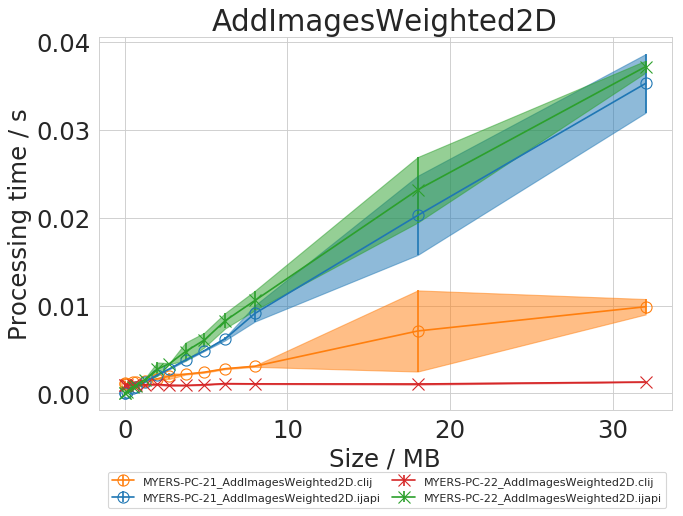

----- processing operation: AddImagesWeighted3D -----
------> processing param Param: size...
-----> other param values ()
                                             Filename  \
0   imagesize\jmh-result_MYERS-PC-21_.AddImagesWei...   
1   imagesize\jmh-result_MYERS-PC-21_.AddImagesWei...   
2   imagesize\jmh-result_MYERS-PC-21_.AddImagesWei...   
3   imagesize\jmh-result_MYERS-PC-21_.AddImagesWei...   
4   imagesize\jmh-result_MYERS-PC-21_.AddImagesWei...   
5   imagesize\jmh-result_MYERS-PC-21_.AddImagesWei...   
6   imagesize\jmh-result_MYERS-PC-21_.AddImagesWei...   
7   imagesize\jmh-result_MYERS-PC-21_.AddImagesWei...   
8   imagesize\jmh-result_MYERS-PC-21_.AddImagesWei...   
9   imagesize\jmh-result_MYERS-PC-21_.AddImagesWei...   
10  imagesize\jmh-result_MYERS-PC-21_.AddImagesWei...   
11  imagesize\jmh-result_MYERS-PC-21_.AddImagesWei...   
12  imagesize\jmh-result_MYERS-PC-21_.AddImagesWei...   
13  imagesize\jmh-result_MYERS-PC-21_.AddImagesWei...   
0   imagesize\jmh-resu

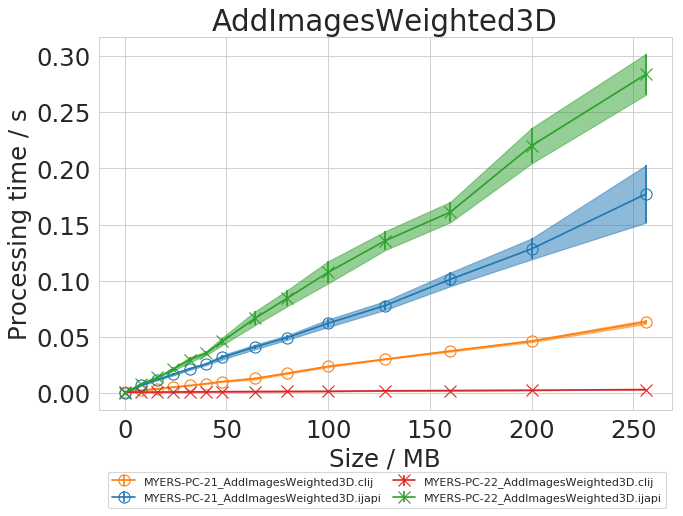

----- processing operation: AddScalar2D -----
------> processing param Param: size...
-----> other param values ()
                                             Filename  \
0   imagesize\jmh-result_MYERS-PC-21_.AddScalar2D....   
1   imagesize\jmh-result_MYERS-PC-21_.AddScalar2D....   
2   imagesize\jmh-result_MYERS-PC-21_.AddScalar2D....   
3   imagesize\jmh-result_MYERS-PC-21_.AddScalar2D....   
4   imagesize\jmh-result_MYERS-PC-21_.AddScalar2D....   
5   imagesize\jmh-result_MYERS-PC-21_.AddScalar2D....   
6   imagesize\jmh-result_MYERS-PC-21_.AddScalar2D....   
7   imagesize\jmh-result_MYERS-PC-21_.AddScalar2D....   
8   imagesize\jmh-result_MYERS-PC-21_.AddScalar2D....   
9   imagesize\jmh-result_MYERS-PC-21_.AddScalar2D....   
10  imagesize\jmh-result_MYERS-PC-21_.AddScalar2D....   
11  imagesize\jmh-result_MYERS-PC-21_.AddScalar2D....   
12  imagesize\jmh-result_MYERS-PC-21_.AddScalar2D....   
13  imagesize\jmh-result_MYERS-PC-21_.AddScalar2D....   
0   imagesize\jmh-result_MYERS

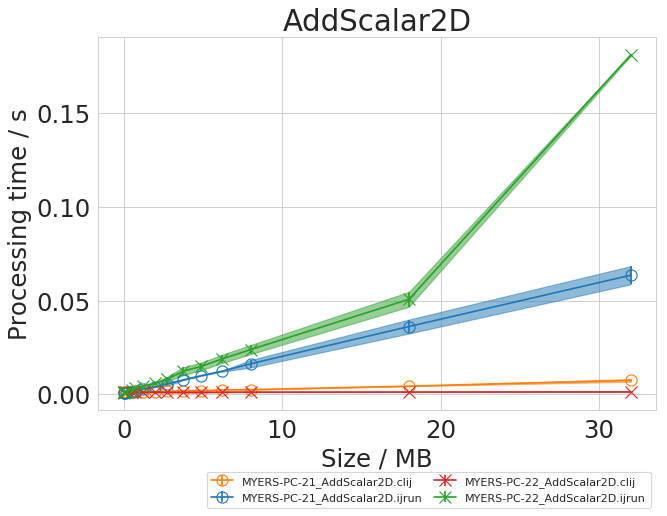

----- processing operation: AddScalar3D -----
------> processing param Param: size...
-----> other param values ()
                                             Filename  \
0   imagesize\jmh-result_MYERS-PC-21_.AddScalar3D....   
1   imagesize\jmh-result_MYERS-PC-21_.AddScalar3D....   
2   imagesize\jmh-result_MYERS-PC-21_.AddScalar3D....   
3   imagesize\jmh-result_MYERS-PC-21_.AddScalar3D....   
4   imagesize\jmh-result_MYERS-PC-21_.AddScalar3D....   
5   imagesize\jmh-result_MYERS-PC-21_.AddScalar3D....   
6   imagesize\jmh-result_MYERS-PC-21_.AddScalar3D....   
7   imagesize\jmh-result_MYERS-PC-21_.AddScalar3D....   
8   imagesize\jmh-result_MYERS-PC-21_.AddScalar3D....   
9   imagesize\jmh-result_MYERS-PC-21_.AddScalar3D....   
10  imagesize\jmh-result_MYERS-PC-21_.AddScalar3D....   
11  imagesize\jmh-result_MYERS-PC-21_.AddScalar3D....   
12  imagesize\jmh-result_MYERS-PC-21_.AddScalar3D....   
13  imagesize\jmh-result_MYERS-PC-21_.AddScalar3D....   
0   imagesize\jmh-result_MYERS

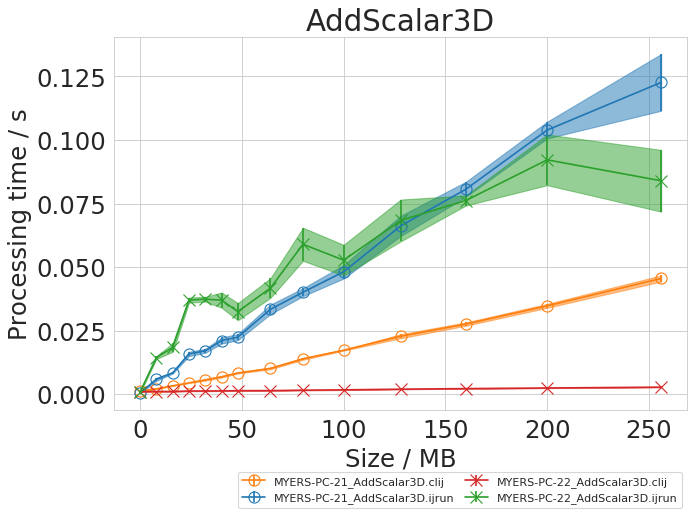

----- processing operation: AutoThreshold2D -----
------> processing param Param: size...
-----> other param values ()
                                             Filename  \
0   imagesize\jmh-result_MYERS-PC-21_.AutoThreshol...   
1   imagesize\jmh-result_MYERS-PC-21_.AutoThreshol...   
2   imagesize\jmh-result_MYERS-PC-21_.AutoThreshol...   
3   imagesize\jmh-result_MYERS-PC-21_.AutoThreshol...   
4   imagesize\jmh-result_MYERS-PC-21_.AutoThreshol...   
5   imagesize\jmh-result_MYERS-PC-21_.AutoThreshol...   
6   imagesize\jmh-result_MYERS-PC-21_.AutoThreshol...   
7   imagesize\jmh-result_MYERS-PC-21_.AutoThreshol...   
8   imagesize\jmh-result_MYERS-PC-21_.AutoThreshol...   
9   imagesize\jmh-result_MYERS-PC-21_.AutoThreshol...   
10  imagesize\jmh-result_MYERS-PC-21_.AutoThreshol...   
11  imagesize\jmh-result_MYERS-PC-21_.AutoThreshol...   
12  imagesize\jmh-result_MYERS-PC-21_.AutoThreshol...   
13  imagesize\jmh-result_MYERS-PC-21_.AutoThreshol...   
0   imagesize\jmh-result_M

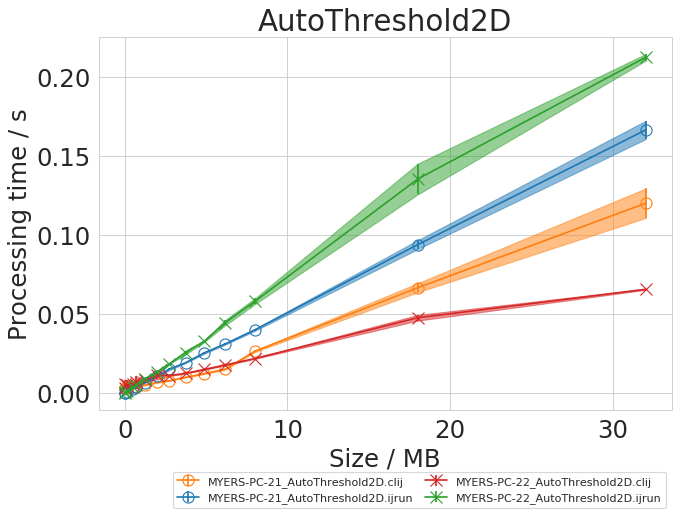

----- processing operation: AutoThreshold3D -----
------> processing param Param: size...
-----> other param values ()
                                             Filename  \
0   imagesize\jmh-result_MYERS-PC-21_.AutoThreshol...   
1   imagesize\jmh-result_MYERS-PC-21_.AutoThreshol...   
2   imagesize\jmh-result_MYERS-PC-21_.AutoThreshol...   
3   imagesize\jmh-result_MYERS-PC-21_.AutoThreshol...   
4   imagesize\jmh-result_MYERS-PC-21_.AutoThreshol...   
5   imagesize\jmh-result_MYERS-PC-21_.AutoThreshol...   
6   imagesize\jmh-result_MYERS-PC-21_.AutoThreshol...   
7   imagesize\jmh-result_MYERS-PC-21_.AutoThreshol...   
8   imagesize\jmh-result_MYERS-PC-21_.AutoThreshol...   
9   imagesize\jmh-result_MYERS-PC-21_.AutoThreshol...   
10  imagesize\jmh-result_MYERS-PC-21_.AutoThreshol...   
11  imagesize\jmh-result_MYERS-PC-21_.AutoThreshol...   
12  imagesize\jmh-result_MYERS-PC-21_.AutoThreshol...   
13  imagesize\jmh-result_MYERS-PC-21_.AutoThreshol...   
0   imagesize\jmh-result_M

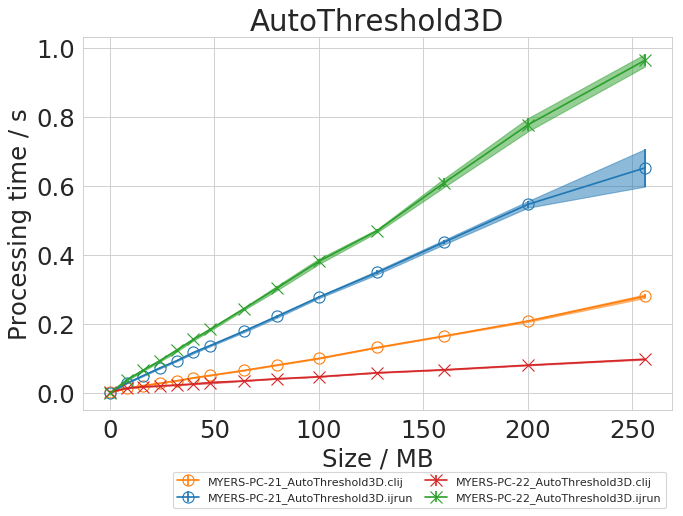

----- processing operation: BinaryAnd2D -----
------> processing param Param: size...
-----> other param values ()
                                             Filename  \
0   imagesize\jmh-result_MYERS-PC-21_.BinaryAnd2D....   
1   imagesize\jmh-result_MYERS-PC-21_.BinaryAnd2D....   
2   imagesize\jmh-result_MYERS-PC-21_.BinaryAnd2D....   
3   imagesize\jmh-result_MYERS-PC-21_.BinaryAnd2D....   
4   imagesize\jmh-result_MYERS-PC-21_.BinaryAnd2D....   
5   imagesize\jmh-result_MYERS-PC-21_.BinaryAnd2D....   
6   imagesize\jmh-result_MYERS-PC-21_.BinaryAnd2D....   
7   imagesize\jmh-result_MYERS-PC-21_.BinaryAnd2D....   
8   imagesize\jmh-result_MYERS-PC-21_.BinaryAnd2D....   
9   imagesize\jmh-result_MYERS-PC-21_.BinaryAnd2D....   
10  imagesize\jmh-result_MYERS-PC-21_.BinaryAnd2D....   
11  imagesize\jmh-result_MYERS-PC-21_.BinaryAnd2D....   
12  imagesize\jmh-result_MYERS-PC-21_.BinaryAnd2D....   
13  imagesize\jmh-result_MYERS-PC-21_.BinaryAnd2D....   
0   imagesize\jmh-result_MYERS

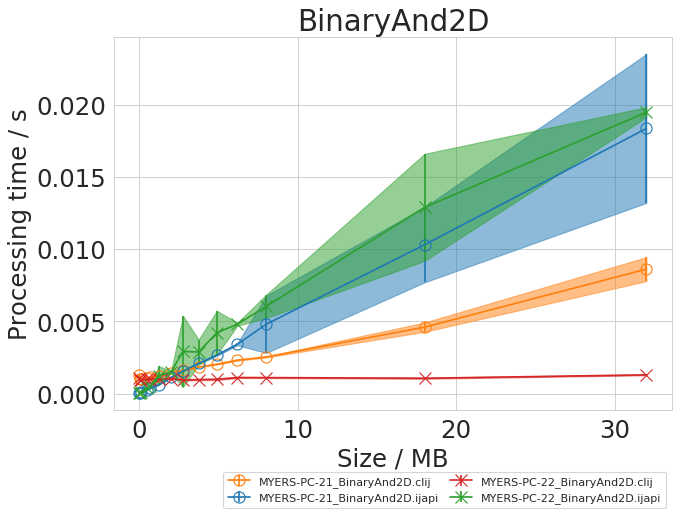

----- processing operation: BinaryAnd3D -----
------> processing param Param: size...
-----> other param values ()
                                             Filename  \
0   imagesize\jmh-result_MYERS-PC-21_.BinaryAnd3D....   
1   imagesize\jmh-result_MYERS-PC-21_.BinaryAnd3D....   
2   imagesize\jmh-result_MYERS-PC-21_.BinaryAnd3D....   
3   imagesize\jmh-result_MYERS-PC-21_.BinaryAnd3D....   
4   imagesize\jmh-result_MYERS-PC-21_.BinaryAnd3D....   
5   imagesize\jmh-result_MYERS-PC-21_.BinaryAnd3D....   
6   imagesize\jmh-result_MYERS-PC-21_.BinaryAnd3D....   
7   imagesize\jmh-result_MYERS-PC-21_.BinaryAnd3D....   
8   imagesize\jmh-result_MYERS-PC-21_.BinaryAnd3D....   
9   imagesize\jmh-result_MYERS-PC-21_.BinaryAnd3D....   
10  imagesize\jmh-result_MYERS-PC-21_.BinaryAnd3D....   
11  imagesize\jmh-result_MYERS-PC-21_.BinaryAnd3D....   
12  imagesize\jmh-result_MYERS-PC-21_.BinaryAnd3D....   
13  imagesize\jmh-result_MYERS-PC-21_.BinaryAnd3D....   
0   imagesize\jmh-result_MYERS

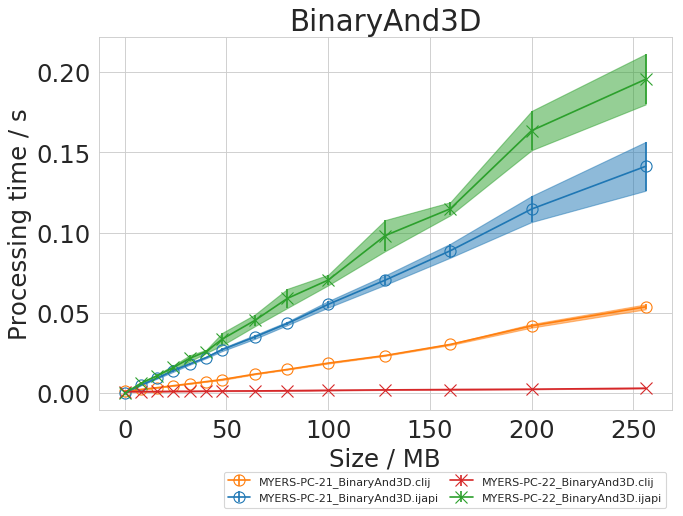

----- processing operation: Erode2D -----
------> processing param Param: size...
-----> other param values ()
                                             Filename  \
0   imagesize\jmh-result_MYERS-PC-21_.Erode2D.clij...   
1   imagesize\jmh-result_MYERS-PC-21_.Erode2D.clij...   
2   imagesize\jmh-result_MYERS-PC-21_.Erode2D.clij...   
3   imagesize\jmh-result_MYERS-PC-21_.Erode2D.clij...   
4   imagesize\jmh-result_MYERS-PC-21_.Erode2D.clij...   
5   imagesize\jmh-result_MYERS-PC-21_.Erode2D.clij...   
6   imagesize\jmh-result_MYERS-PC-21_.Erode2D.clij...   
7   imagesize\jmh-result_MYERS-PC-21_.Erode2D.clij...   
8   imagesize\jmh-result_MYERS-PC-21_.Erode2D.clij...   
9   imagesize\jmh-result_MYERS-PC-21_.Erode2D.clij...   
10  imagesize\jmh-result_MYERS-PC-21_.Erode2D.clij...   
11  imagesize\jmh-result_MYERS-PC-21_.Erode2D.clij...   
12  imagesize\jmh-result_MYERS-PC-21_.Erode2D.clij...   
13  imagesize\jmh-result_MYERS-PC-21_.Erode2D.clij...   
0   imagesize\jmh-result_MYERS-PC-

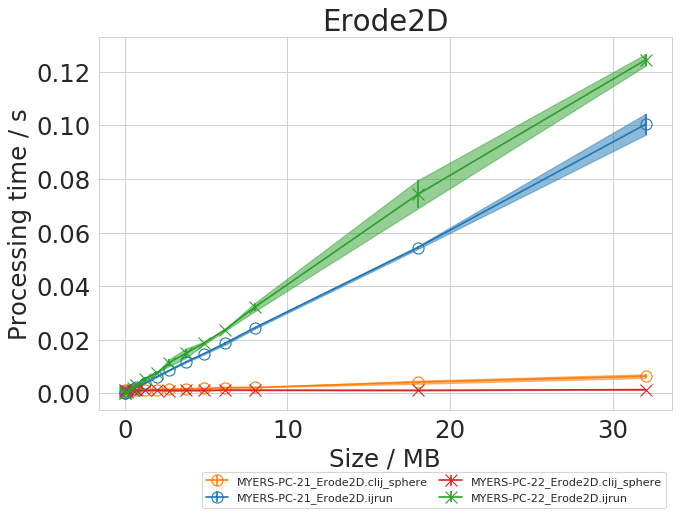

----- processing operation: Erode3D -----
------> processing param Param: size...
-----> other param values ()
                                             Filename  \
0   imagesize\jmh-result_MYERS-PC-21_.Erode3D.clij...   
1   imagesize\jmh-result_MYERS-PC-21_.Erode3D.clij...   
2   imagesize\jmh-result_MYERS-PC-21_.Erode3D.clij...   
3   imagesize\jmh-result_MYERS-PC-21_.Erode3D.clij...   
4   imagesize\jmh-result_MYERS-PC-21_.Erode3D.clij...   
5   imagesize\jmh-result_MYERS-PC-21_.Erode3D.clij...   
6   imagesize\jmh-result_MYERS-PC-21_.Erode3D.clij...   
7   imagesize\jmh-result_MYERS-PC-21_.Erode3D.clij...   
8   imagesize\jmh-result_MYERS-PC-21_.Erode3D.clij...   
9   imagesize\jmh-result_MYERS-PC-21_.Erode3D.clij...   
10  imagesize\jmh-result_MYERS-PC-21_.Erode3D.clij...   
11  imagesize\jmh-result_MYERS-PC-21_.Erode3D.clij...   
12  imagesize\jmh-result_MYERS-PC-21_.Erode3D.clij...   
13  imagesize\jmh-result_MYERS-PC-21_.Erode3D.clij...   
0   imagesize\jmh-result_MYERS-PC-

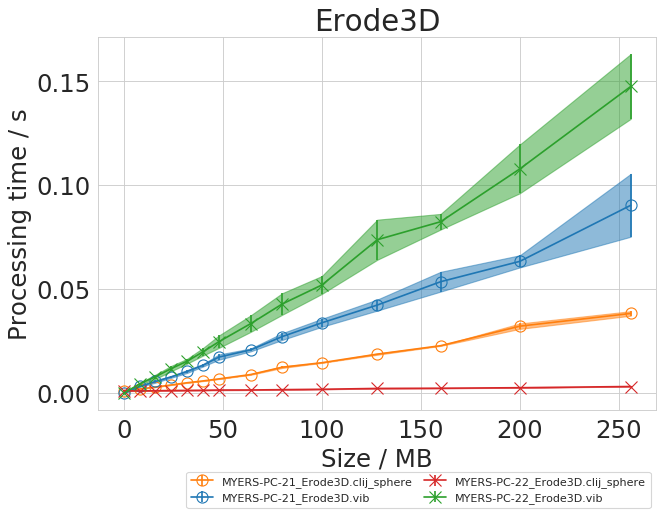

----- processing operation: FixedThreshold2D -----
------> processing param Param: size...
-----> other param values ()
                                             Filename  \
0   imagesize\jmh-result_MYERS-PC-21_.FixedThresho...   
1   imagesize\jmh-result_MYERS-PC-21_.FixedThresho...   
2   imagesize\jmh-result_MYERS-PC-21_.FixedThresho...   
3   imagesize\jmh-result_MYERS-PC-21_.FixedThresho...   
4   imagesize\jmh-result_MYERS-PC-21_.FixedThresho...   
5   imagesize\jmh-result_MYERS-PC-21_.FixedThresho...   
6   imagesize\jmh-result_MYERS-PC-21_.FixedThresho...   
7   imagesize\jmh-result_MYERS-PC-21_.FixedThresho...   
8   imagesize\jmh-result_MYERS-PC-21_.FixedThresho...   
9   imagesize\jmh-result_MYERS-PC-21_.FixedThresho...   
10  imagesize\jmh-result_MYERS-PC-21_.FixedThresho...   
11  imagesize\jmh-result_MYERS-PC-21_.FixedThresho...   
12  imagesize\jmh-result_MYERS-PC-21_.FixedThresho...   
13  imagesize\jmh-result_MYERS-PC-21_.FixedThresho...   
0   imagesize\jmh-result_

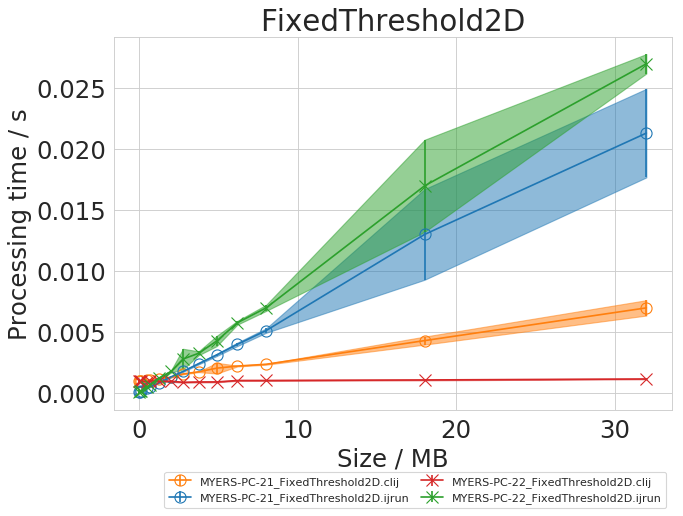

----- processing operation: FixedThreshold3D -----
------> processing param Param: size...
-----> other param values ()
                                             Filename  \
0   imagesize\jmh-result_MYERS-PC-21_.FixedThresho...   
1   imagesize\jmh-result_MYERS-PC-21_.FixedThresho...   
2   imagesize\jmh-result_MYERS-PC-21_.FixedThresho...   
3   imagesize\jmh-result_MYERS-PC-21_.FixedThresho...   
4   imagesize\jmh-result_MYERS-PC-21_.FixedThresho...   
5   imagesize\jmh-result_MYERS-PC-21_.FixedThresho...   
6   imagesize\jmh-result_MYERS-PC-21_.FixedThresho...   
7   imagesize\jmh-result_MYERS-PC-21_.FixedThresho...   
8   imagesize\jmh-result_MYERS-PC-21_.FixedThresho...   
9   imagesize\jmh-result_MYERS-PC-21_.FixedThresho...   
10  imagesize\jmh-result_MYERS-PC-21_.FixedThresho...   
11  imagesize\jmh-result_MYERS-PC-21_.FixedThresho...   
12  imagesize\jmh-result_MYERS-PC-21_.FixedThresho...   
13  imagesize\jmh-result_MYERS-PC-21_.FixedThresho...   
0   imagesize\jmh-result_

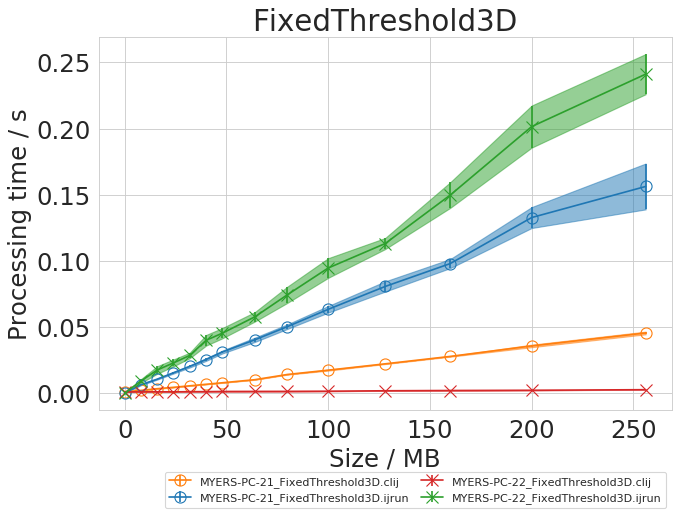

----- processing operation: Flip2D -----
------> processing param Param: size...
-----> other param values ()
                                             Filename  \
0   imagesize\jmh-result_MYERS-PC-21_.Flip2D.clij.csv   
1   imagesize\jmh-result_MYERS-PC-21_.Flip2D.clij.csv   
2   imagesize\jmh-result_MYERS-PC-21_.Flip2D.clij.csv   
3   imagesize\jmh-result_MYERS-PC-21_.Flip2D.clij.csv   
4   imagesize\jmh-result_MYERS-PC-21_.Flip2D.clij.csv   
5   imagesize\jmh-result_MYERS-PC-21_.Flip2D.clij.csv   
6   imagesize\jmh-result_MYERS-PC-21_.Flip2D.clij.csv   
7   imagesize\jmh-result_MYERS-PC-21_.Flip2D.clij.csv   
8   imagesize\jmh-result_MYERS-PC-21_.Flip2D.clij.csv   
9   imagesize\jmh-result_MYERS-PC-21_.Flip2D.clij.csv   
10  imagesize\jmh-result_MYERS-PC-21_.Flip2D.clij.csv   
11  imagesize\jmh-result_MYERS-PC-21_.Flip2D.clij.csv   
12  imagesize\jmh-result_MYERS-PC-21_.Flip2D.clij.csv   
13  imagesize\jmh-result_MYERS-PC-21_.Flip2D.clij.csv   
0   imagesize\jmh-result_MYERS-PC-2

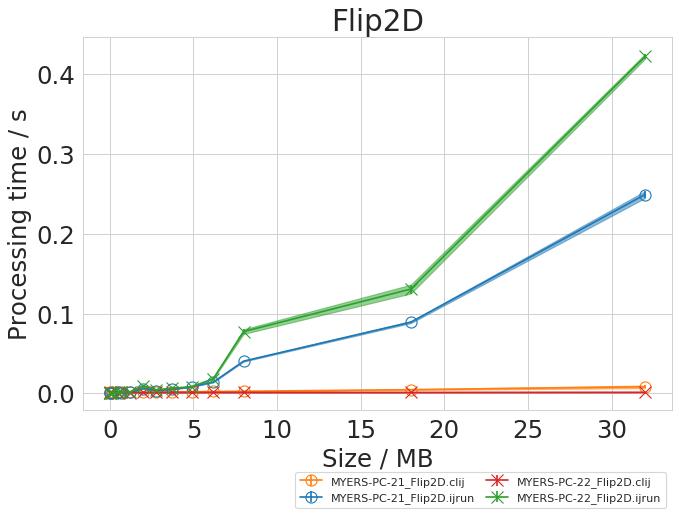

----- processing operation: Flip3D -----
------> processing param Param: size...
-----> other param values ()
                                             Filename  \
0   imagesize\jmh-result_MYERS-PC-21_.Flip3D.clij.csv   
1   imagesize\jmh-result_MYERS-PC-21_.Flip3D.clij.csv   
2   imagesize\jmh-result_MYERS-PC-21_.Flip3D.clij.csv   
3   imagesize\jmh-result_MYERS-PC-21_.Flip3D.clij.csv   
4   imagesize\jmh-result_MYERS-PC-21_.Flip3D.clij.csv   
5   imagesize\jmh-result_MYERS-PC-21_.Flip3D.clij.csv   
6   imagesize\jmh-result_MYERS-PC-21_.Flip3D.clij.csv   
7   imagesize\jmh-result_MYERS-PC-21_.Flip3D.clij.csv   
8   imagesize\jmh-result_MYERS-PC-21_.Flip3D.clij.csv   
9   imagesize\jmh-result_MYERS-PC-21_.Flip3D.clij.csv   
10  imagesize\jmh-result_MYERS-PC-21_.Flip3D.clij.csv   
11  imagesize\jmh-result_MYERS-PC-21_.Flip3D.clij.csv   
12  imagesize\jmh-result_MYERS-PC-21_.Flip3D.clij.csv   
13  imagesize\jmh-result_MYERS-PC-21_.Flip3D.clij.csv   
0   imagesize\jmh-result_MYERS-PC-2

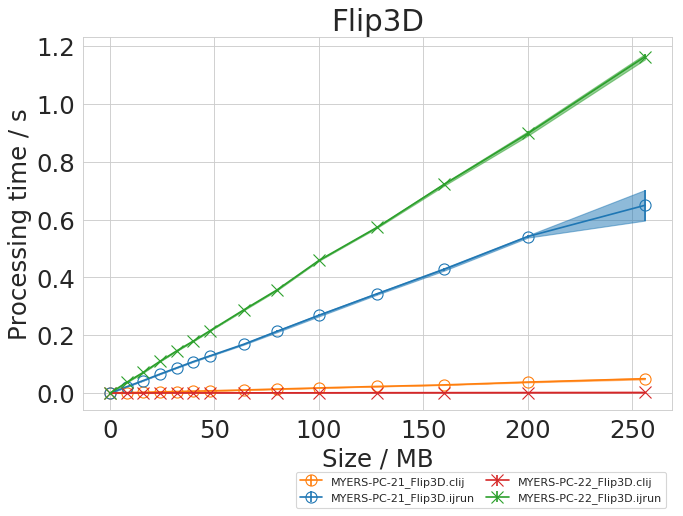

----- processing operation: GaussianBlur2D -----
------> processing param Param: size...
-----> other param values ()
                                             Filename  \
0   imagesize\jmh-result_MYERS-PC-21_.GaussianBlur...   
1   imagesize\jmh-result_MYERS-PC-21_.GaussianBlur...   
2   imagesize\jmh-result_MYERS-PC-21_.GaussianBlur...   
3   imagesize\jmh-result_MYERS-PC-21_.GaussianBlur...   
4   imagesize\jmh-result_MYERS-PC-21_.GaussianBlur...   
5   imagesize\jmh-result_MYERS-PC-21_.GaussianBlur...   
6   imagesize\jmh-result_MYERS-PC-21_.GaussianBlur...   
7   imagesize\jmh-result_MYERS-PC-21_.GaussianBlur...   
8   imagesize\jmh-result_MYERS-PC-21_.GaussianBlur...   
9   imagesize\jmh-result_MYERS-PC-21_.GaussianBlur...   
10  imagesize\jmh-result_MYERS-PC-21_.GaussianBlur...   
11  imagesize\jmh-result_MYERS-PC-21_.GaussianBlur...   
12  imagesize\jmh-result_MYERS-PC-21_.GaussianBlur...   
13  imagesize\jmh-result_MYERS-PC-21_.GaussianBlur...   
0   imagesize\jmh-result_MY

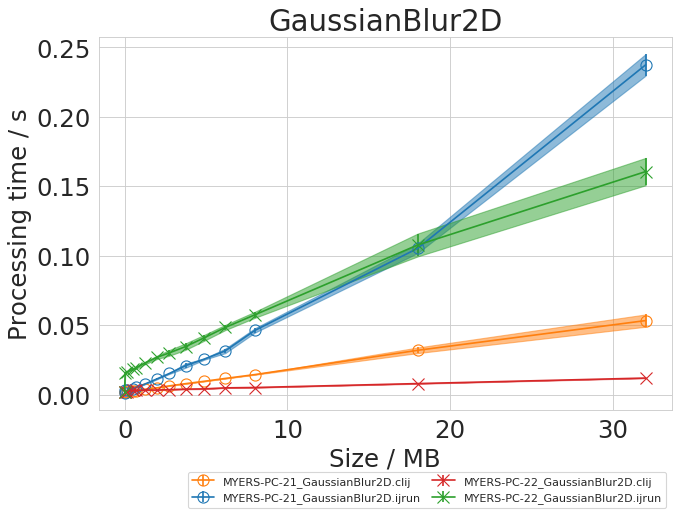

----- processing operation: GaussianBlur3D -----
------> processing param Param: size...
-----> other param values ()
                                             Filename  \
0   imagesize\jmh-result_MYERS-PC-21_.GaussianBlur...   
1   imagesize\jmh-result_MYERS-PC-21_.GaussianBlur...   
2   imagesize\jmh-result_MYERS-PC-21_.GaussianBlur...   
3   imagesize\jmh-result_MYERS-PC-21_.GaussianBlur...   
4   imagesize\jmh-result_MYERS-PC-21_.GaussianBlur...   
5   imagesize\jmh-result_MYERS-PC-21_.GaussianBlur...   
6   imagesize\jmh-result_MYERS-PC-21_.GaussianBlur...   
7   imagesize\jmh-result_MYERS-PC-21_.GaussianBlur...   
8   imagesize\jmh-result_MYERS-PC-21_.GaussianBlur...   
9   imagesize\jmh-result_MYERS-PC-21_.GaussianBlur...   
10  imagesize\jmh-result_MYERS-PC-21_.GaussianBlur...   
11  imagesize\jmh-result_MYERS-PC-21_.GaussianBlur...   
12  imagesize\jmh-result_MYERS-PC-21_.GaussianBlur...   
13  imagesize\jmh-result_MYERS-PC-21_.GaussianBlur...   
0   imagesize\jmh-result_MY

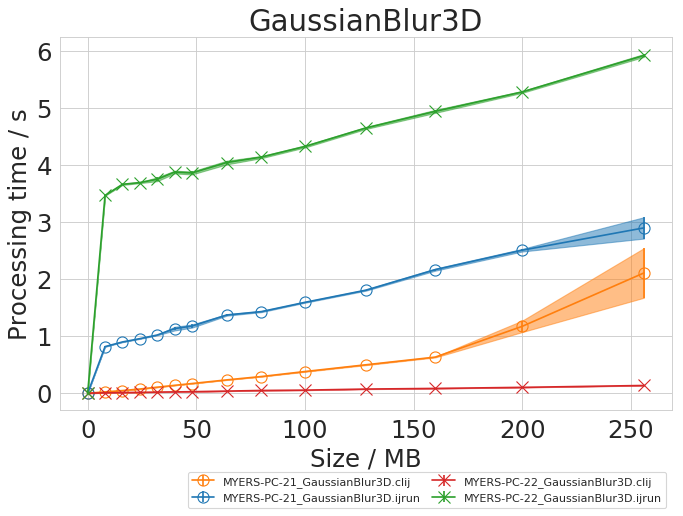

----- processing operation: MaximumZProjection -----
------> processing param Param: size...
-----> other param values ()
                                             Filename  \
0   imagesize\jmh-result_MYERS-PC-21_.MaximumZProj...   
1   imagesize\jmh-result_MYERS-PC-21_.MaximumZProj...   
2   imagesize\jmh-result_MYERS-PC-21_.MaximumZProj...   
3   imagesize\jmh-result_MYERS-PC-21_.MaximumZProj...   
4   imagesize\jmh-result_MYERS-PC-21_.MaximumZProj...   
5   imagesize\jmh-result_MYERS-PC-21_.MaximumZProj...   
6   imagesize\jmh-result_MYERS-PC-21_.MaximumZProj...   
7   imagesize\jmh-result_MYERS-PC-21_.MaximumZProj...   
8   imagesize\jmh-result_MYERS-PC-21_.MaximumZProj...   
9   imagesize\jmh-result_MYERS-PC-21_.MaximumZProj...   
10  imagesize\jmh-result_MYERS-PC-21_.MaximumZProj...   
11  imagesize\jmh-result_MYERS-PC-21_.MaximumZProj...   
12  imagesize\jmh-result_MYERS-PC-21_.MaximumZProj...   
13  imagesize\jmh-result_MYERS-PC-21_.MaximumZProj...   
0   imagesize\jmh-resul

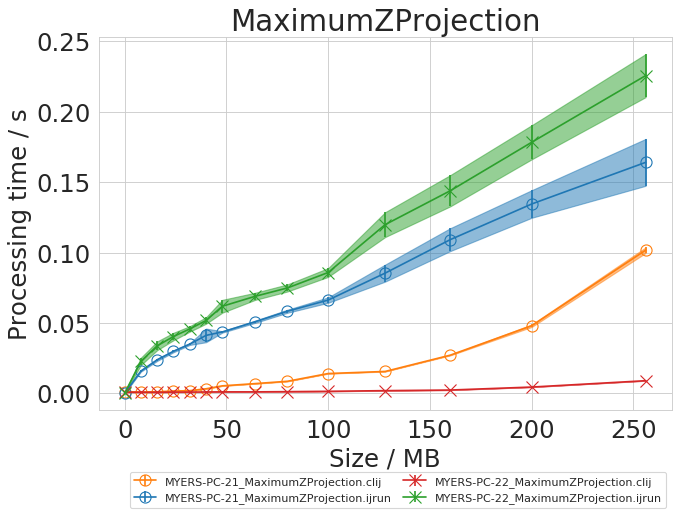

----- processing operation: Mean2D -----
------> processing param Param: size...
-----> other param values ()
                                             Filename  \
0   imagesize\jmh-result_MYERS-PC-21_.Mean2D.clij_...   
1   imagesize\jmh-result_MYERS-PC-21_.Mean2D.clij_...   
2   imagesize\jmh-result_MYERS-PC-21_.Mean2D.clij_...   
3   imagesize\jmh-result_MYERS-PC-21_.Mean2D.clij_...   
4   imagesize\jmh-result_MYERS-PC-21_.Mean2D.clij_...   
5   imagesize\jmh-result_MYERS-PC-21_.Mean2D.clij_...   
6   imagesize\jmh-result_MYERS-PC-21_.Mean2D.clij_...   
7   imagesize\jmh-result_MYERS-PC-21_.Mean2D.clij_...   
8   imagesize\jmh-result_MYERS-PC-21_.Mean2D.clij_...   
9   imagesize\jmh-result_MYERS-PC-21_.Mean2D.clij_...   
10  imagesize\jmh-result_MYERS-PC-21_.Mean2D.clij_...   
11  imagesize\jmh-result_MYERS-PC-21_.Mean2D.clij_...   
12  imagesize\jmh-result_MYERS-PC-21_.Mean2D.clij_...   
13  imagesize\jmh-result_MYERS-PC-21_.Mean2D.clij_...   
0   imagesize\jmh-result_MYERS-PC-2

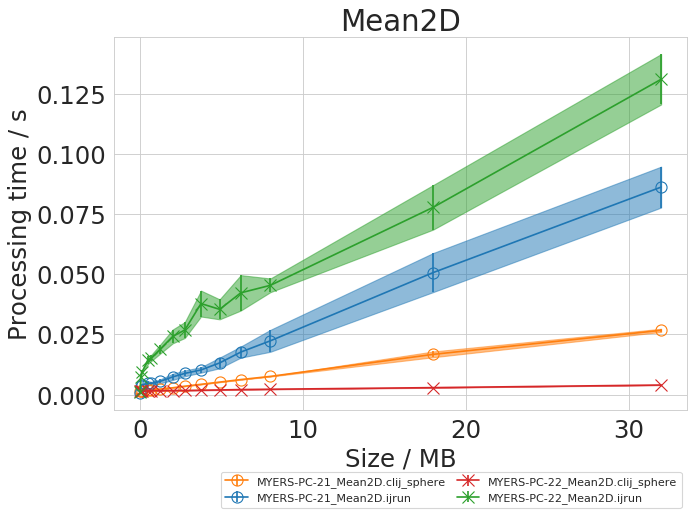

----- processing operation: Mean3D -----
------> processing param Param: size...
-----> other param values ()
                                             Filename  \
0   imagesize\jmh-result_MYERS-PC-21_.Mean3D.clij_...   
1   imagesize\jmh-result_MYERS-PC-21_.Mean3D.clij_...   
2   imagesize\jmh-result_MYERS-PC-21_.Mean3D.clij_...   
3   imagesize\jmh-result_MYERS-PC-21_.Mean3D.clij_...   
4   imagesize\jmh-result_MYERS-PC-21_.Mean3D.clij_...   
5   imagesize\jmh-result_MYERS-PC-21_.Mean3D.clij_...   
6   imagesize\jmh-result_MYERS-PC-21_.Mean3D.clij_...   
7   imagesize\jmh-result_MYERS-PC-21_.Mean3D.clij_...   
8   imagesize\jmh-result_MYERS-PC-21_.Mean3D.clij_...   
9   imagesize\jmh-result_MYERS-PC-21_.Mean3D.clij_...   
10  imagesize\jmh-result_MYERS-PC-21_.Mean3D.clij_...   
11  imagesize\jmh-result_MYERS-PC-21_.Mean3D.clij_...   
12  imagesize\jmh-result_MYERS-PC-21_.Mean3D.clij_...   
13  imagesize\jmh-result_MYERS-PC-21_.Mean3D.clij_...   
0   imagesize\jmh-result_MYERS-PC-2

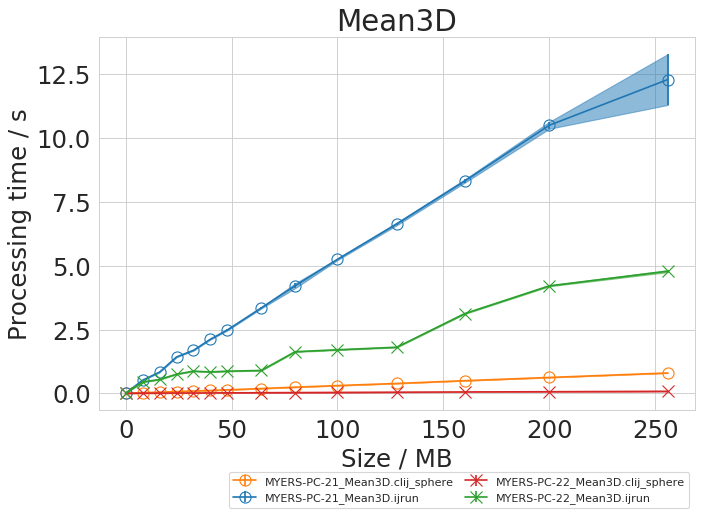

----- processing operation: Median2D -----
------> processing param Param: size...
-----> other param values ()
                                             Filename  \
0   imagesize\jmh-result_MYERS-PC-21_.Median2D.cli...   
1   imagesize\jmh-result_MYERS-PC-21_.Median2D.cli...   
2   imagesize\jmh-result_MYERS-PC-21_.Median2D.cli...   
3   imagesize\jmh-result_MYERS-PC-21_.Median2D.cli...   
4   imagesize\jmh-result_MYERS-PC-21_.Median2D.cli...   
5   imagesize\jmh-result_MYERS-PC-21_.Median2D.cli...   
6   imagesize\jmh-result_MYERS-PC-21_.Median2D.cli...   
7   imagesize\jmh-result_MYERS-PC-21_.Median2D.cli...   
8   imagesize\jmh-result_MYERS-PC-21_.Median2D.cli...   
9   imagesize\jmh-result_MYERS-PC-21_.Median2D.cli...   
10  imagesize\jmh-result_MYERS-PC-21_.Median2D.cli...   
11  imagesize\jmh-result_MYERS-PC-21_.Median2D.cli...   
12  imagesize\jmh-result_MYERS-PC-21_.Median2D.cli...   
13  imagesize\jmh-result_MYERS-PC-21_.Median2D.cli...   
0   imagesize\jmh-result_MYERS-PC

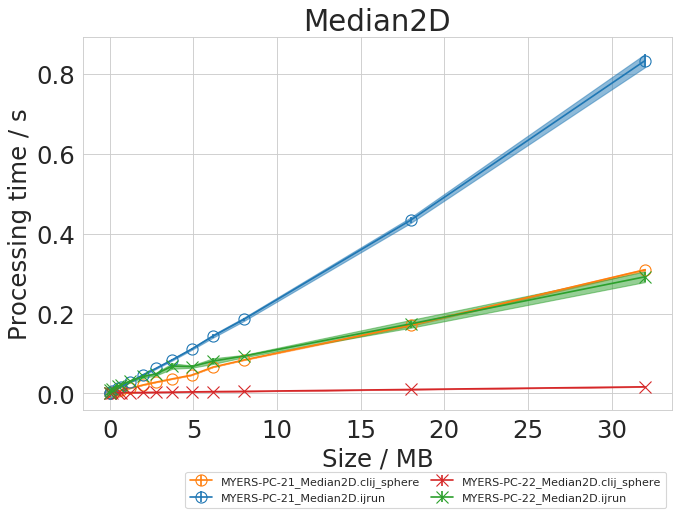

----- processing operation: Median3D -----
------> processing param Param: size...
-----> other param values ()
                                             Filename  \
0   imagesize\jmh-result_MYERS-PC-21_.Median3D.cli...   
1   imagesize\jmh-result_MYERS-PC-21_.Median3D.cli...   
2   imagesize\jmh-result_MYERS-PC-21_.Median3D.cli...   
3   imagesize\jmh-result_MYERS-PC-21_.Median3D.cli...   
4   imagesize\jmh-result_MYERS-PC-21_.Median3D.cli...   
5   imagesize\jmh-result_MYERS-PC-21_.Median3D.cli...   
6   imagesize\jmh-result_MYERS-PC-21_.Median3D.cli...   
7   imagesize\jmh-result_MYERS-PC-21_.Median3D.cli...   
8   imagesize\jmh-result_MYERS-PC-21_.Median3D.cli...   
9   imagesize\jmh-result_MYERS-PC-21_.Median3D.cli...   
10  imagesize\jmh-result_MYERS-PC-21_.Median3D.cli...   
11  imagesize\jmh-result_MYERS-PC-21_.Median3D.cli...   
12  imagesize\jmh-result_MYERS-PC-21_.Median3D.cli...   
13  imagesize\jmh-result_MYERS-PC-21_.Median3D.cli...   
0   imagesize\jmh-result_MYERS-PC

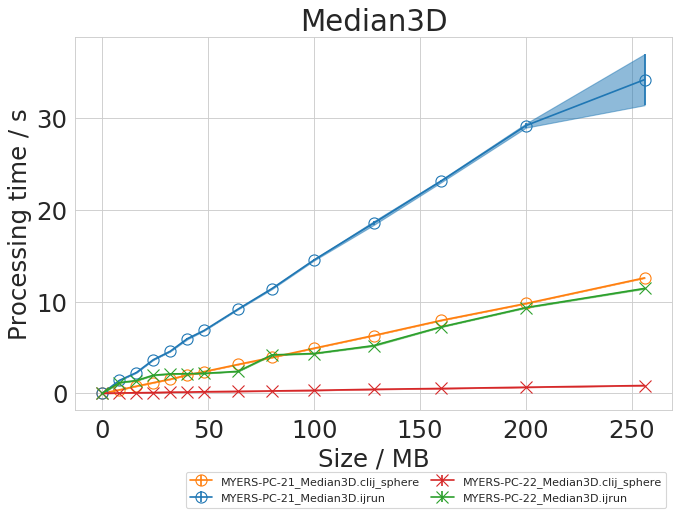

----- processing operation: Minimum2D -----
------> processing param Param: size...
-----> other param values ()
                                             Filename  \
0   imagesize\jmh-result_MYERS-PC-21_.Minimum2D.cl...   
1   imagesize\jmh-result_MYERS-PC-21_.Minimum2D.cl...   
2   imagesize\jmh-result_MYERS-PC-21_.Minimum2D.cl...   
3   imagesize\jmh-result_MYERS-PC-21_.Minimum2D.cl...   
4   imagesize\jmh-result_MYERS-PC-21_.Minimum2D.cl...   
5   imagesize\jmh-result_MYERS-PC-21_.Minimum2D.cl...   
6   imagesize\jmh-result_MYERS-PC-21_.Minimum2D.cl...   
7   imagesize\jmh-result_MYERS-PC-21_.Minimum2D.cl...   
8   imagesize\jmh-result_MYERS-PC-21_.Minimum2D.cl...   
9   imagesize\jmh-result_MYERS-PC-21_.Minimum2D.cl...   
10  imagesize\jmh-result_MYERS-PC-21_.Minimum2D.cl...   
11  imagesize\jmh-result_MYERS-PC-21_.Minimum2D.cl...   
12  imagesize\jmh-result_MYERS-PC-21_.Minimum2D.cl...   
13  imagesize\jmh-result_MYERS-PC-21_.Minimum2D.cl...   
0   imagesize\jmh-result_MYERS-P

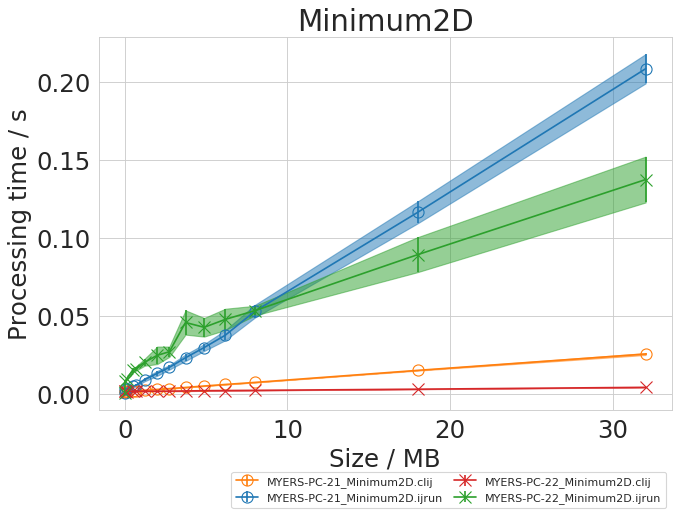

----- processing operation: Minimum3D -----
------> processing param Param: size...
-----> other param values ()
                                             Filename  \
0   imagesize\jmh-result_MYERS-PC-21_.Minimum3D.cl...   
1   imagesize\jmh-result_MYERS-PC-21_.Minimum3D.cl...   
2   imagesize\jmh-result_MYERS-PC-21_.Minimum3D.cl...   
3   imagesize\jmh-result_MYERS-PC-21_.Minimum3D.cl...   
4   imagesize\jmh-result_MYERS-PC-21_.Minimum3D.cl...   
5   imagesize\jmh-result_MYERS-PC-21_.Minimum3D.cl...   
6   imagesize\jmh-result_MYERS-PC-21_.Minimum3D.cl...   
7   imagesize\jmh-result_MYERS-PC-21_.Minimum3D.cl...   
8   imagesize\jmh-result_MYERS-PC-21_.Minimum3D.cl...   
9   imagesize\jmh-result_MYERS-PC-21_.Minimum3D.cl...   
10  imagesize\jmh-result_MYERS-PC-21_.Minimum3D.cl...   
11  imagesize\jmh-result_MYERS-PC-21_.Minimum3D.cl...   
12  imagesize\jmh-result_MYERS-PC-21_.Minimum3D.cl...   
13  imagesize\jmh-result_MYERS-PC-21_.Minimum3D.cl...   
0   imagesize\jmh-result_MYERS-P

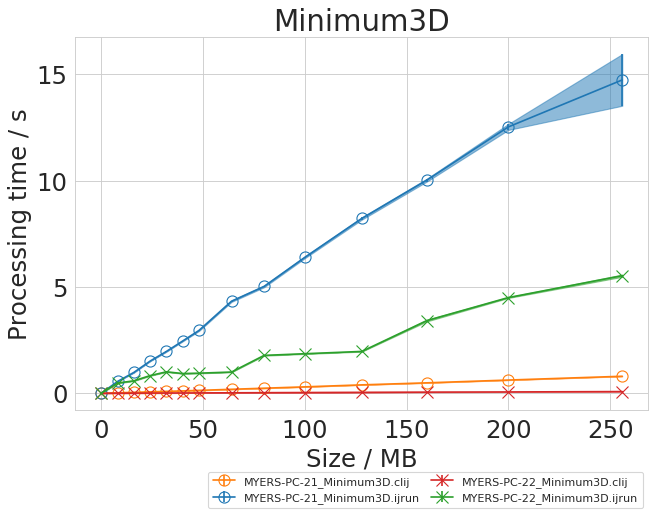

----- processing operation: MultiplyScalar2D -----
------> processing param Param: size...
-----> other param values ()
                                             Filename  \
0   imagesize\jmh-result_MYERS-PC-21_.MultiplyScal...   
1   imagesize\jmh-result_MYERS-PC-21_.MultiplyScal...   
2   imagesize\jmh-result_MYERS-PC-21_.MultiplyScal...   
3   imagesize\jmh-result_MYERS-PC-21_.MultiplyScal...   
4   imagesize\jmh-result_MYERS-PC-21_.MultiplyScal...   
5   imagesize\jmh-result_MYERS-PC-21_.MultiplyScal...   
6   imagesize\jmh-result_MYERS-PC-21_.MultiplyScal...   
7   imagesize\jmh-result_MYERS-PC-21_.MultiplyScal...   
8   imagesize\jmh-result_MYERS-PC-21_.MultiplyScal...   
9   imagesize\jmh-result_MYERS-PC-21_.MultiplyScal...   
10  imagesize\jmh-result_MYERS-PC-21_.MultiplyScal...   
11  imagesize\jmh-result_MYERS-PC-21_.MultiplyScal...   
12  imagesize\jmh-result_MYERS-PC-21_.MultiplyScal...   
13  imagesize\jmh-result_MYERS-PC-21_.MultiplyScal...   
0   imagesize\jmh-result_

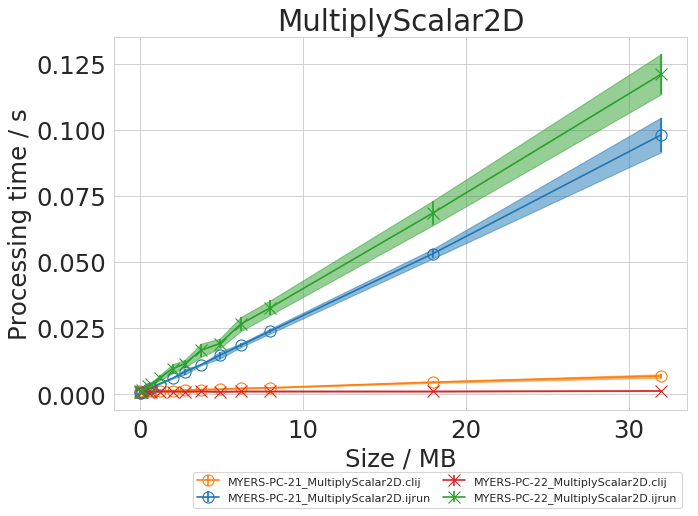

----- processing operation: MultiplyScalar3D -----
------> processing param Param: size...
-----> other param values ()
                                             Filename  \
0   imagesize\jmh-result_MYERS-PC-21_.MultiplyScal...   
1   imagesize\jmh-result_MYERS-PC-21_.MultiplyScal...   
2   imagesize\jmh-result_MYERS-PC-21_.MultiplyScal...   
3   imagesize\jmh-result_MYERS-PC-21_.MultiplyScal...   
4   imagesize\jmh-result_MYERS-PC-21_.MultiplyScal...   
5   imagesize\jmh-result_MYERS-PC-21_.MultiplyScal...   
6   imagesize\jmh-result_MYERS-PC-21_.MultiplyScal...   
7   imagesize\jmh-result_MYERS-PC-21_.MultiplyScal...   
8   imagesize\jmh-result_MYERS-PC-21_.MultiplyScal...   
9   imagesize\jmh-result_MYERS-PC-21_.MultiplyScal...   
10  imagesize\jmh-result_MYERS-PC-21_.MultiplyScal...   
11  imagesize\jmh-result_MYERS-PC-21_.MultiplyScal...   
12  imagesize\jmh-result_MYERS-PC-21_.MultiplyScal...   
13  imagesize\jmh-result_MYERS-PC-21_.MultiplyScal...   
0   imagesize\jmh-result_

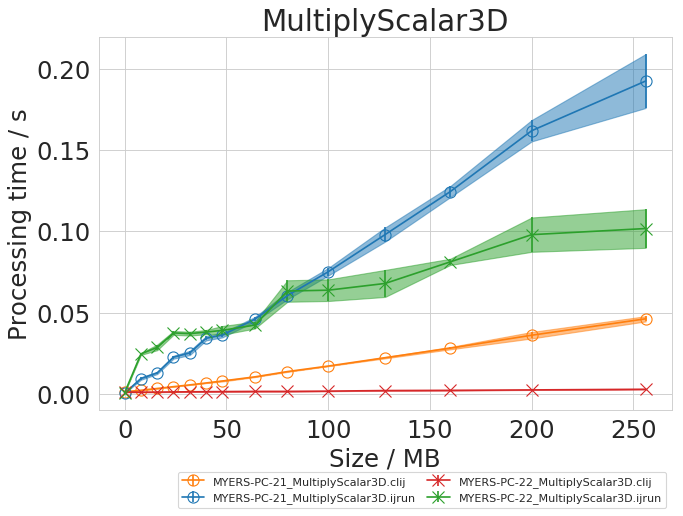

----- processing operation: RadialReslice -----
------> processing param Param: size...
-----> other param values ()
                                             Filename  \
0   imagesize\jmh-result_MYERS-PC-21_.RadialReslic...   
1   imagesize\jmh-result_MYERS-PC-21_.RadialReslic...   
2   imagesize\jmh-result_MYERS-PC-21_.RadialReslic...   
3   imagesize\jmh-result_MYERS-PC-21_.RadialReslic...   
4   imagesize\jmh-result_MYERS-PC-21_.RadialReslic...   
5   imagesize\jmh-result_MYERS-PC-21_.RadialReslic...   
6   imagesize\jmh-result_MYERS-PC-21_.RadialReslic...   
7   imagesize\jmh-result_MYERS-PC-21_.RadialReslic...   
8   imagesize\jmh-result_MYERS-PC-21_.RadialReslic...   
9   imagesize\jmh-result_MYERS-PC-21_.RadialReslic...   
10  imagesize\jmh-result_MYERS-PC-21_.RadialReslic...   
11  imagesize\jmh-result_MYERS-PC-21_.RadialReslic...   
12  imagesize\jmh-result_MYERS-PC-21_.RadialReslic...   
0   imagesize\jmh-result_MYERS-PC-21_.RadialReslic...   
1   imagesize\jmh-result_MYE

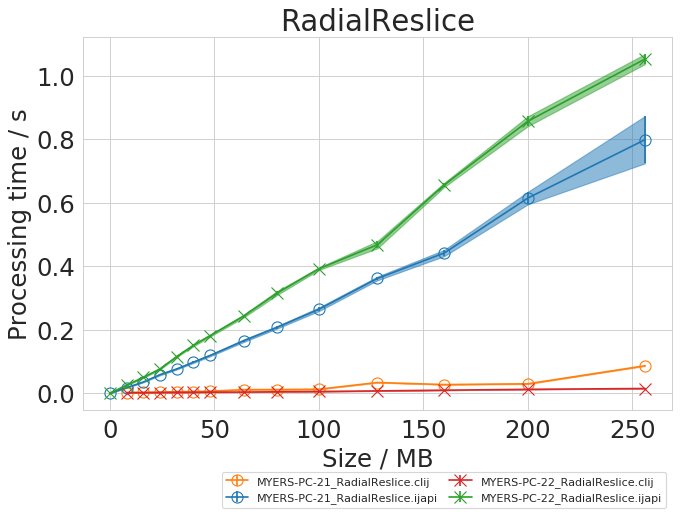

----- processing operation: Rotate2D -----
------> processing param Param: size...
-----> other param values ()
                                             Filename  \
0   imagesize\jmh-result_MYERS-PC-21_.Rotate2D.cli...   
1   imagesize\jmh-result_MYERS-PC-21_.Rotate2D.cli...   
2   imagesize\jmh-result_MYERS-PC-21_.Rotate2D.cli...   
3   imagesize\jmh-result_MYERS-PC-21_.Rotate2D.cli...   
4   imagesize\jmh-result_MYERS-PC-21_.Rotate2D.cli...   
5   imagesize\jmh-result_MYERS-PC-21_.Rotate2D.cli...   
6   imagesize\jmh-result_MYERS-PC-21_.Rotate2D.cli...   
7   imagesize\jmh-result_MYERS-PC-21_.Rotate2D.cli...   
8   imagesize\jmh-result_MYERS-PC-21_.Rotate2D.cli...   
9   imagesize\jmh-result_MYERS-PC-21_.Rotate2D.cli...   
10  imagesize\jmh-result_MYERS-PC-21_.Rotate2D.cli...   
11  imagesize\jmh-result_MYERS-PC-21_.Rotate2D.cli...   
12  imagesize\jmh-result_MYERS-PC-21_.Rotate2D.cli...   
13  imagesize\jmh-result_MYERS-PC-21_.Rotate2D.cli...   
0   imagesize\jmh-result_MYERS-PC

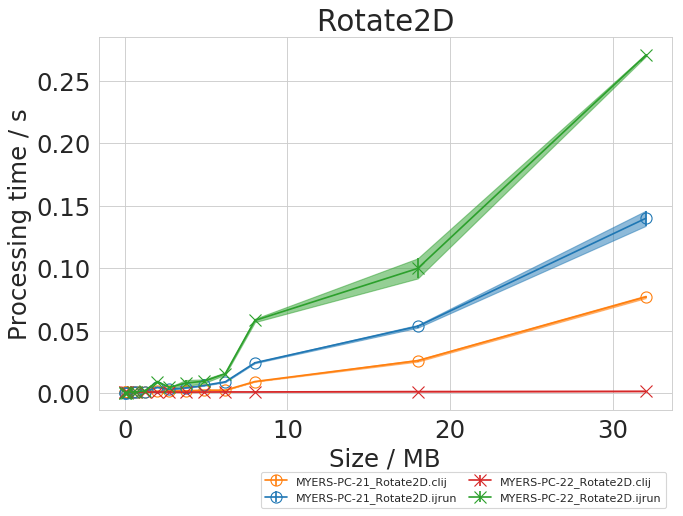

----- processing operation: Rotate3D -----
------> processing param Param: size...
-----> other param values ()
                                             Filename  \
0   imagesize\jmh-result_MYERS-PC-21_.Rotate3D.cli...   
1   imagesize\jmh-result_MYERS-PC-21_.Rotate3D.cli...   
2   imagesize\jmh-result_MYERS-PC-21_.Rotate3D.cli...   
3   imagesize\jmh-result_MYERS-PC-21_.Rotate3D.cli...   
4   imagesize\jmh-result_MYERS-PC-21_.Rotate3D.cli...   
5   imagesize\jmh-result_MYERS-PC-21_.Rotate3D.cli...   
6   imagesize\jmh-result_MYERS-PC-21_.Rotate3D.cli...   
7   imagesize\jmh-result_MYERS-PC-21_.Rotate3D.cli...   
8   imagesize\jmh-result_MYERS-PC-21_.Rotate3D.cli...   
9   imagesize\jmh-result_MYERS-PC-21_.Rotate3D.cli...   
10  imagesize\jmh-result_MYERS-PC-21_.Rotate3D.cli...   
11  imagesize\jmh-result_MYERS-PC-21_.Rotate3D.cli...   
12  imagesize\jmh-result_MYERS-PC-21_.Rotate3D.cli...   
13  imagesize\jmh-result_MYERS-PC-21_.Rotate3D.cli...   
0   imagesize\jmh-result_MYERS-PC

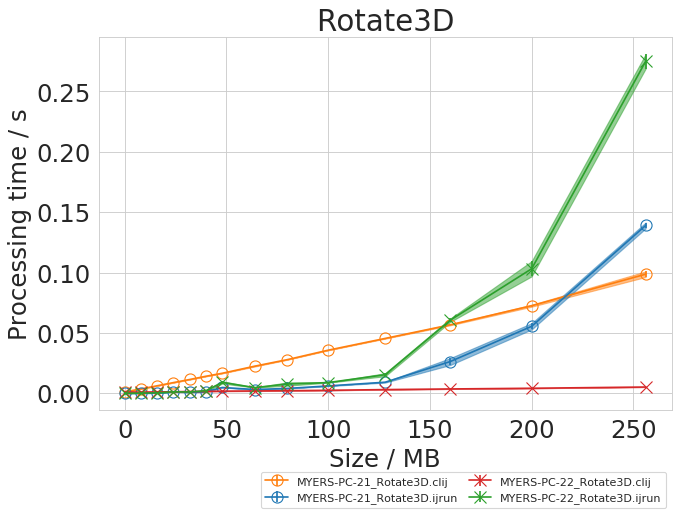

In [12]:
from script import process_frame
f = process_frame(mdf, verbose=1, save_dir=save_dir, name=name)